<h1>Taiwanese Credit Default</h1>
<p>

</p>
<p>

</p>

<ol>
<li>Exploratory Data Analysis and Data Munging
<li>Baseline Modeling
<li>Model Tuning and Performance Analysis
<li>Final Insights
</ol>



In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<h1>Exploratory Data Analysis</h1>

<p>Defaults are an important aspect in risk management for creditors. This EDA explores factors which may play a role in defaulting amongst demographics.

The data comes with the following features:</p>
<ul>
<li>ID - Unique ID of each client
<li>LIMIT_BAL - Describes amount of credit given in NT dollars
<li>SEX - Gender: 1 for male, 2 for female
<li>EDUCATION - Describes education levels(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
<li>MARRIAGE - Marriage status of client(1=married, 2=single, 3=others)
<li>AGE - Age in yrs of client
<li>PAY_0 -  Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
<li>PAY_2 - Repayment status in August, 2005 (scale same as above)
<li>PAY_3 - Repayment status in July, 2005 (scale same as above)
<li>PAY_4 - Repayment status in June, 2005 (scale same as above)
<li>PAY_5 - Repayment status in May, 2005 (scale same as above)
<li>PAY_6 - Repayment status in April, 2005 (scale same as above)
<li>BILL_AMT1 - Amount of bill statement in September, 2005 (NT dollar)
<li>BILL_AMT2 - Amount of bill statement in August, 2005 (NT dollar)
<li>BILL_AMT3 - Amount of bill statement in July, 2005 (NT dollar)
<li>BILL_AMT4 - Amount of bill statement in June, 2005 (NT dollar)
<li>BILL_AMT5 - Amount of bill statement in May, 2005 (NT dollar)
<li>BILL_AMT6 - Amount of bill statement in April, 2005 (NT dollar)
<li>PAY_AMT1 - Amount of previous payment in September, 2005 (NT dollar)
<li>PAY_AMT2 - Amount of previous payment in August, 2005 (NT dollar)
<li>PAY_AMT3 - Amount of previous payment in July, 2005 (NT dollar)
<li>PAY_AMT4 - Amount of previous payment in June, 2005 (NT dollar)
<li>PAY_AMT5 - Amount of previous payment in May, 2005 (NT dollar)
<li>PAY_AMT6 - Amount of previous payment in April, 2005 (NT dollar)
<li>default.payment.next.month: Target variable in experiment, details default payment (1=yes, 0=no) in subsequent month
</ul>


In [17]:
uci_dataset = pd.read_csv('UCI_credit_card.csv')
uci_dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [37]:
pd.set_option('display.max_columns', None)
uci_dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.819267,1.555467,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.707450,0.518137,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


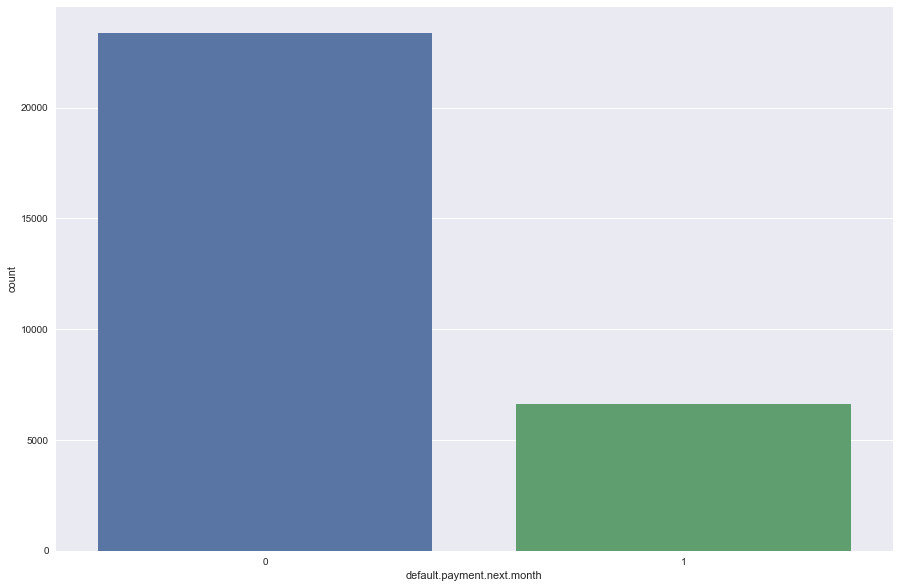

In [19]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
def_count = sns.countplot(uci_dataset['default.payment.next.month'])

Approximately 30% of individuals in the entire data set defaulted in the subsequent month of this data.

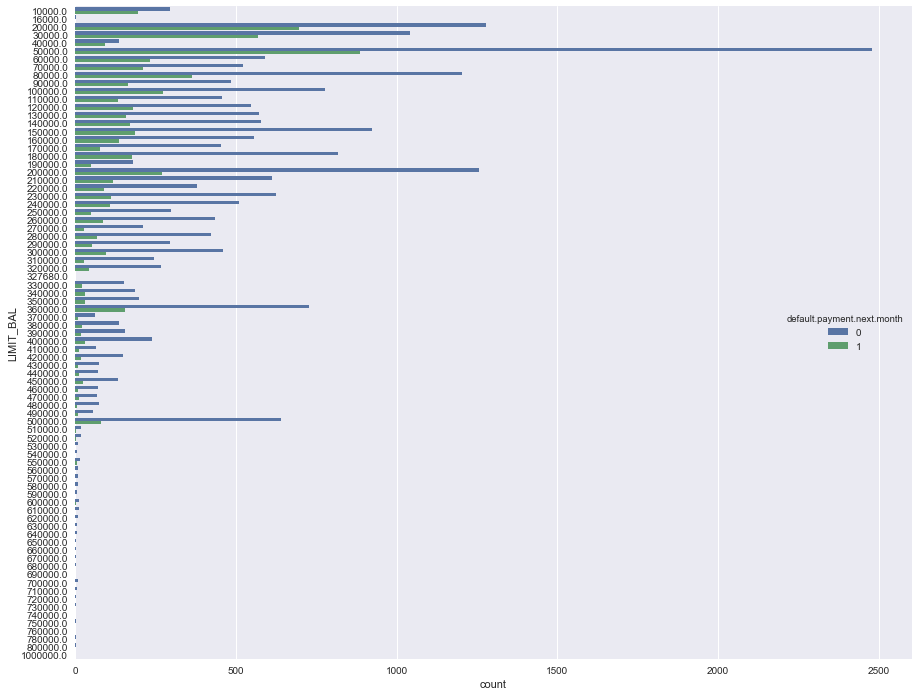

In [20]:
plt.figure(figsize=(15,12))
sns.set(font_scale=1)
limit_dist = sns.countplot(y='LIMIT_BAL',data=uci_dataset[['LIMIT_BAL','default.payment.next.month']], 
                           hue = 'default.payment.next.month'
                          )

#People with lower credit lines tend to have higher default occurences

<p>Individuals with lower credit balances are more prone to the likelihood of defaulting. With a little knowledge about how credit limit works, a higher limit is usually determined by income, credit history, and credit history. What this tells us is that be a good indicator of a person's stability, thus, they bear a better capacity of meeting their agreed minimum payments. <br> </br>

<br>To put these values into scale, the current exchange for a TWD to USD is 1 USD : 0.0333 TWD.</br> </p>

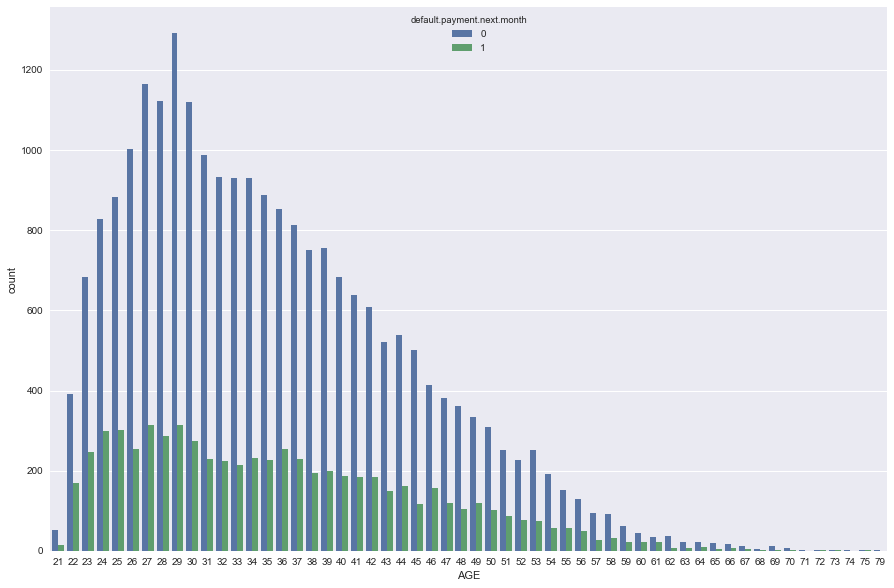

In [21]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
age_dist = sns.countplot(x='AGE', data=uci_dataset[['AGE','default.payment.next.month']], hue='default.payment.next.month')
#age is positively skewed


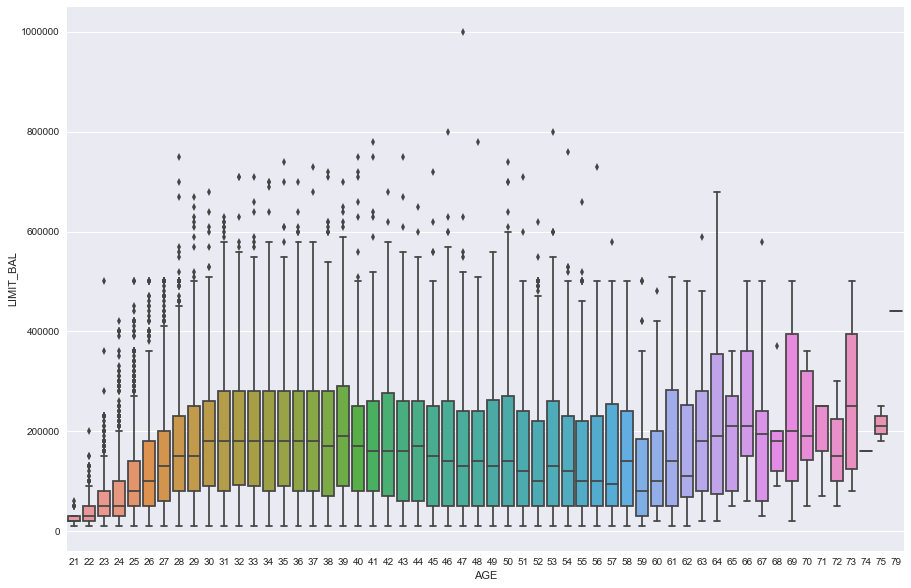

In [22]:
plt.figure(figsize=(15,10))
sns.boxplot(x='AGE', y='LIMIT_BAL', data=uci_dataset)

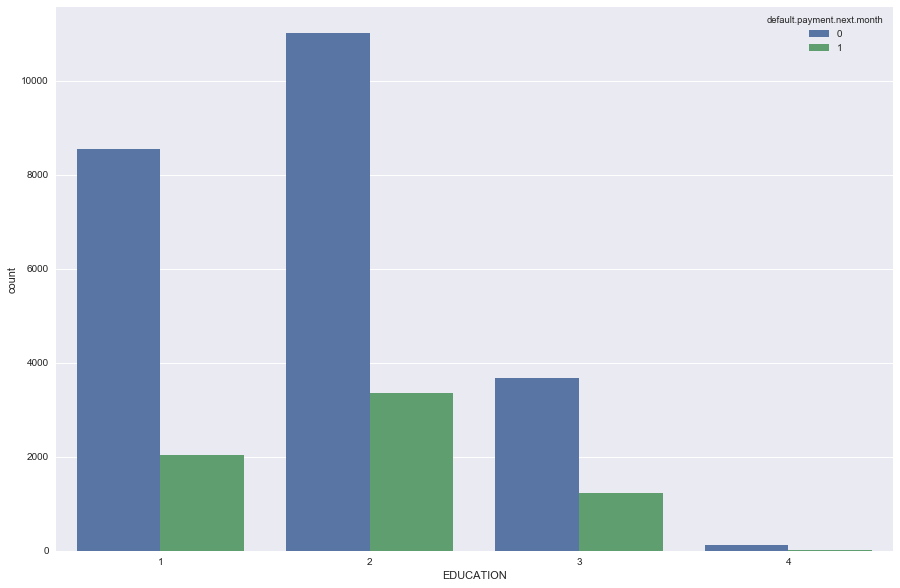

In [23]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)

ed_med=uci_dataset['EDUCATION'].median()

uci_dataset['EDUCATION'] = uci_dataset['EDUCATION'].replace(0, ed_med)
uci_dataset['EDUCATION'] = uci_dataset['EDUCATION'].replace(5, ed_med)
uci_dataset['EDUCATION'] = uci_dataset['EDUCATION'].replace(6, ed_med)

age_dist = sns.countplot(x='EDUCATION', data=uci_dataset[['EDUCATION', 'default.payment.next.month']], 
                         hue='default.payment.next.month')


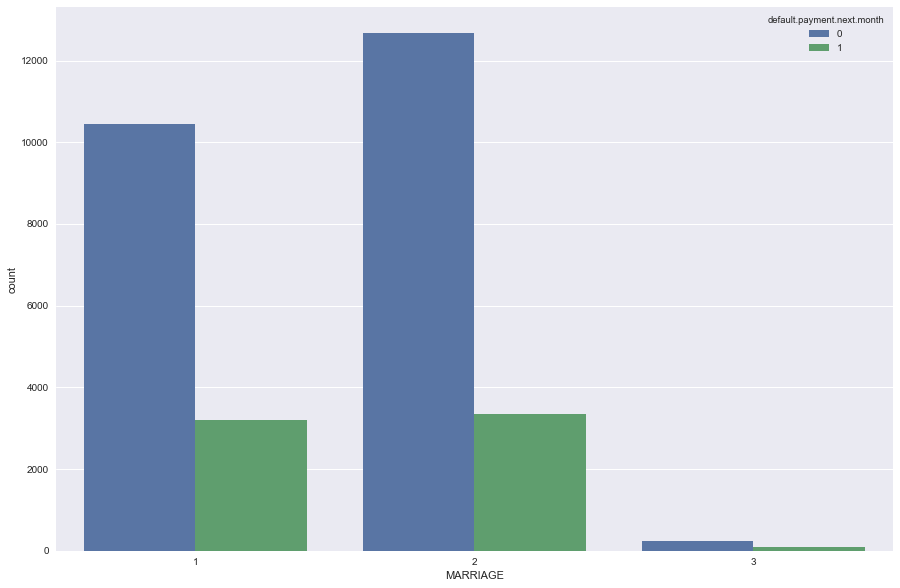

In [24]:
uci_dataset['MARRIAGE'] = uci_dataset['MARRIAGE'].replace(0, uci_dataset['MARRIAGE'].median())
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
age_dist = sns.countplot(x='MARRIAGE', data=uci_dataset[['MARRIAGE', 'default.payment.next.month']], 
                         hue='default.payment.next.month'
                         )

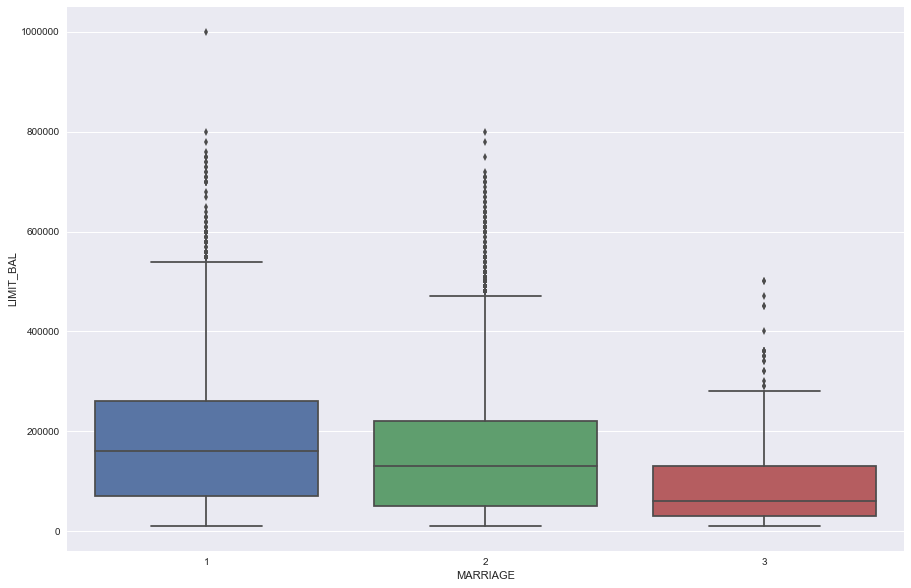

In [38]:
plt.figure(figsize=(15,10))
sns.boxplot(x='MARRIAGE', y='LIMIT_BAL', data=uci_dataset)

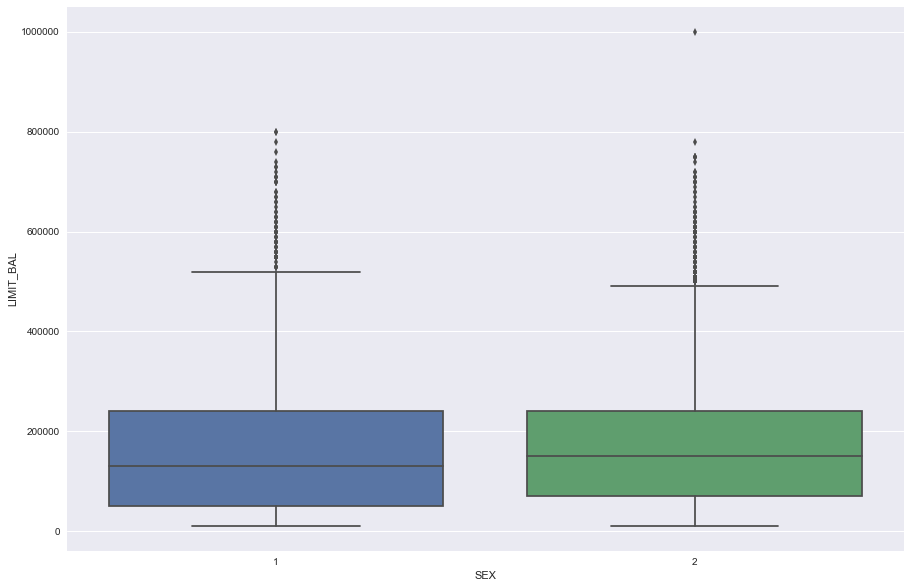

In [44]:
plt.figure(figsize=(15,10))
sns.boxplot(x='SEX', y='LIMIT_BAL', data=uci_dataset)

In the boxplot above, the 25th percentile amongst females is considerably higher than that of males. To explore this further, the following plot examines the progression of categorical distributions across age against limit balance. It is apparent that females reach higher medians faster, yet males exhibit wider ranges.

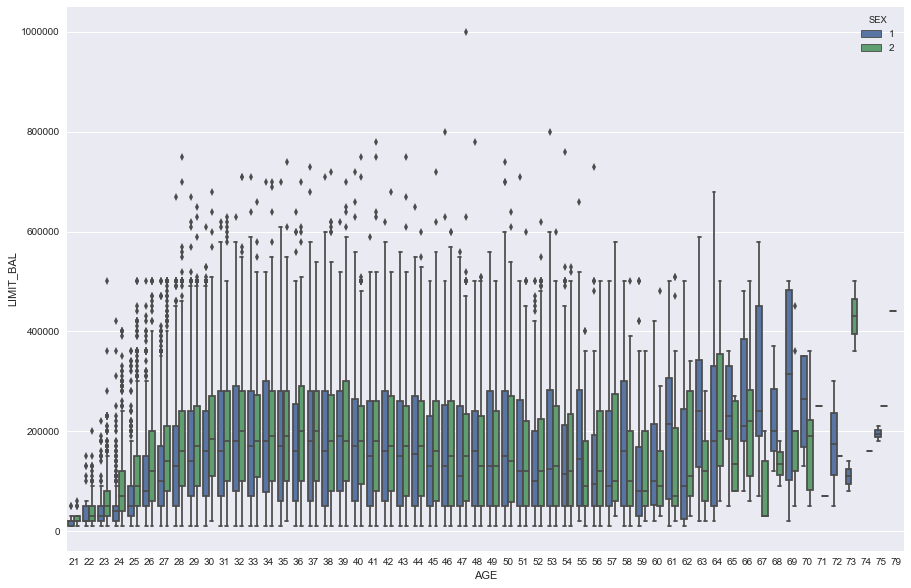

In [51]:
plt.figure(figsize=(15,10))
sns.boxplot(x='AGE', y='LIMIT_BAL', data=uci_dataset, hue='SEX')

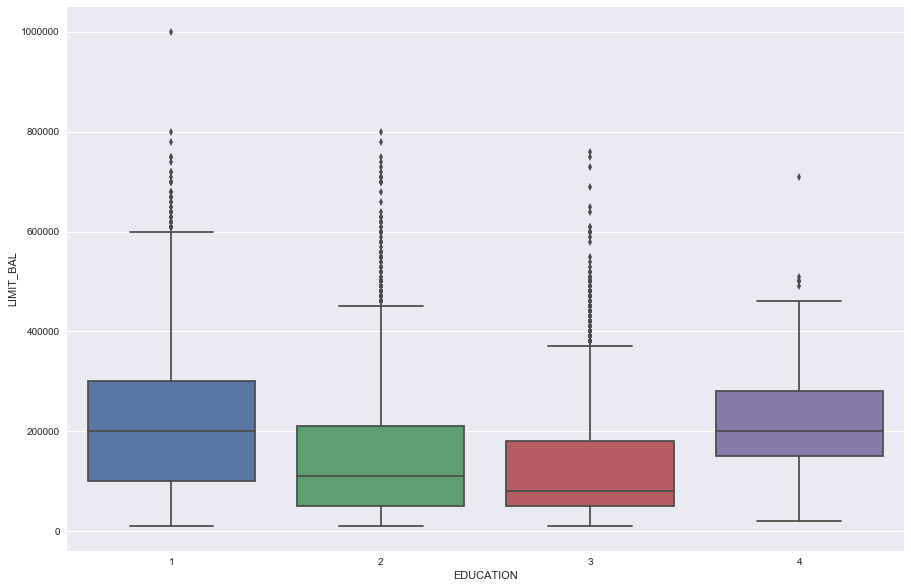

In [39]:
plt.figure(figsize=(15,10))
sns.boxplot(x='EDUCATION', y='LIMIT_BAL', data=uci_dataset)

Individuals in the dataset that completed graduate school seem to have the highest median income among the educational classes, whereas those who completed college or highschool remain at sub 200,000 NT dollars.

Additionally, married individuals seem to have a slightly higher median limit balance in comparison to single individuals.

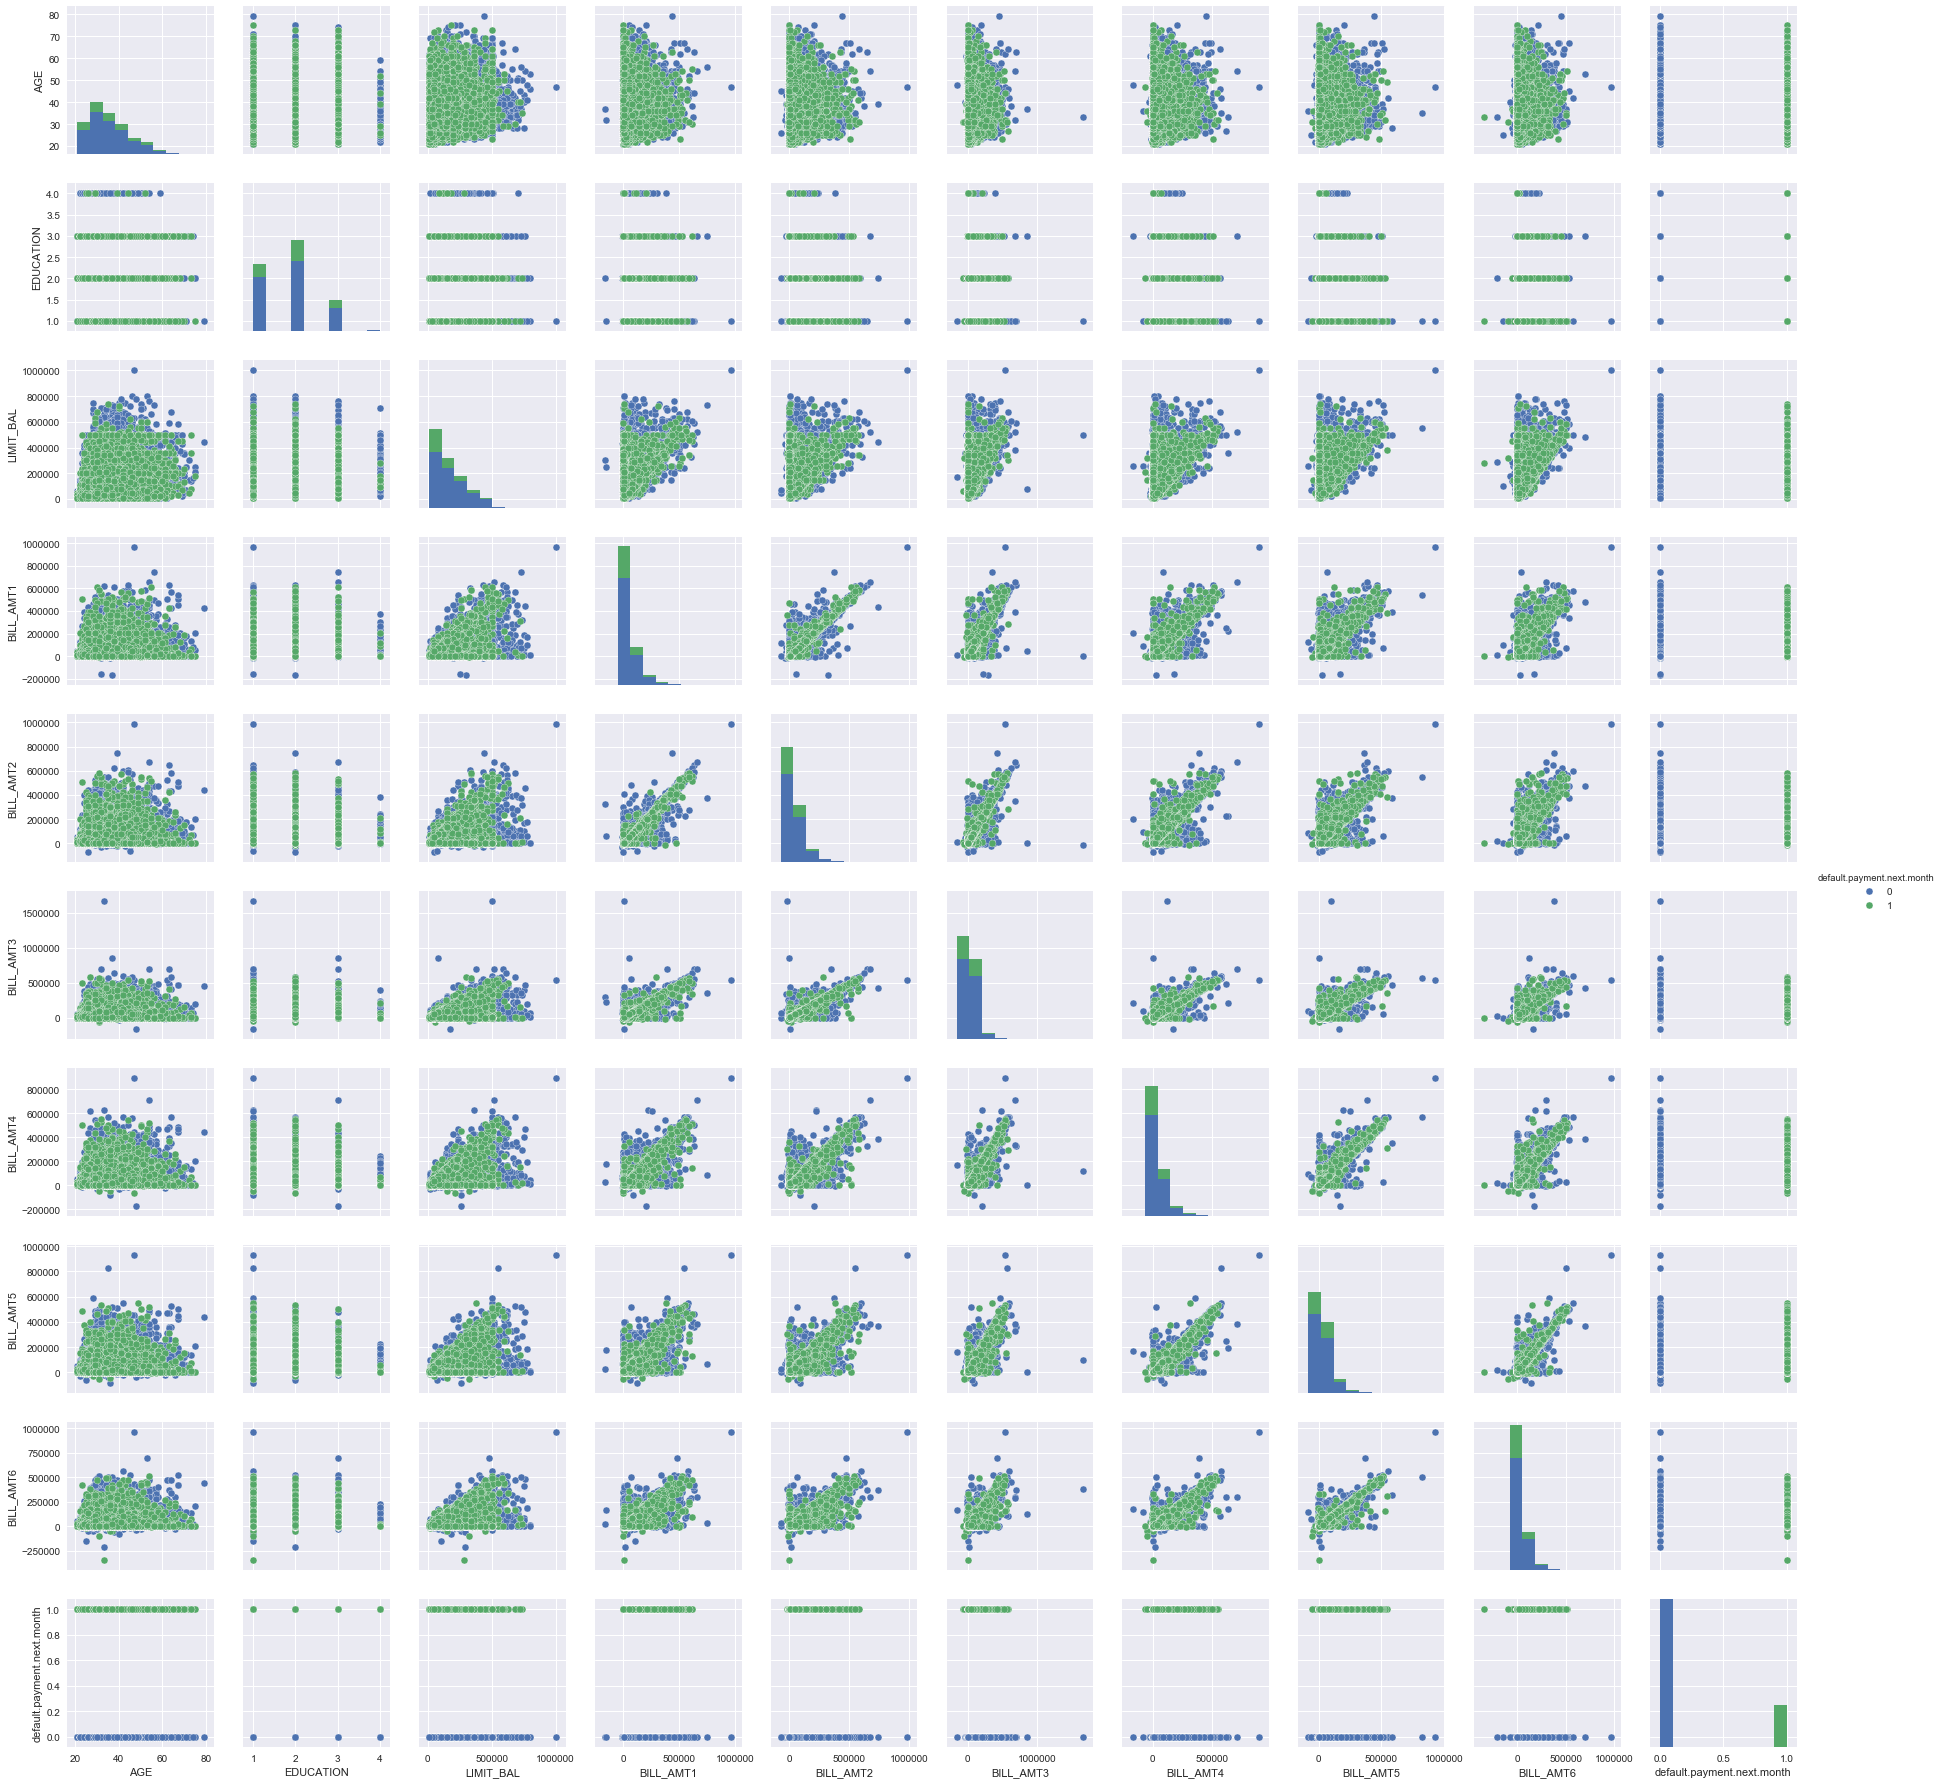

In [27]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
bill_amounts = uci_dataset[['AGE', 'EDUCATION', 'LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', 'default.payment.next.month']]
sns.pairplot(data=bill_amounts,hue="default.payment.next.month")

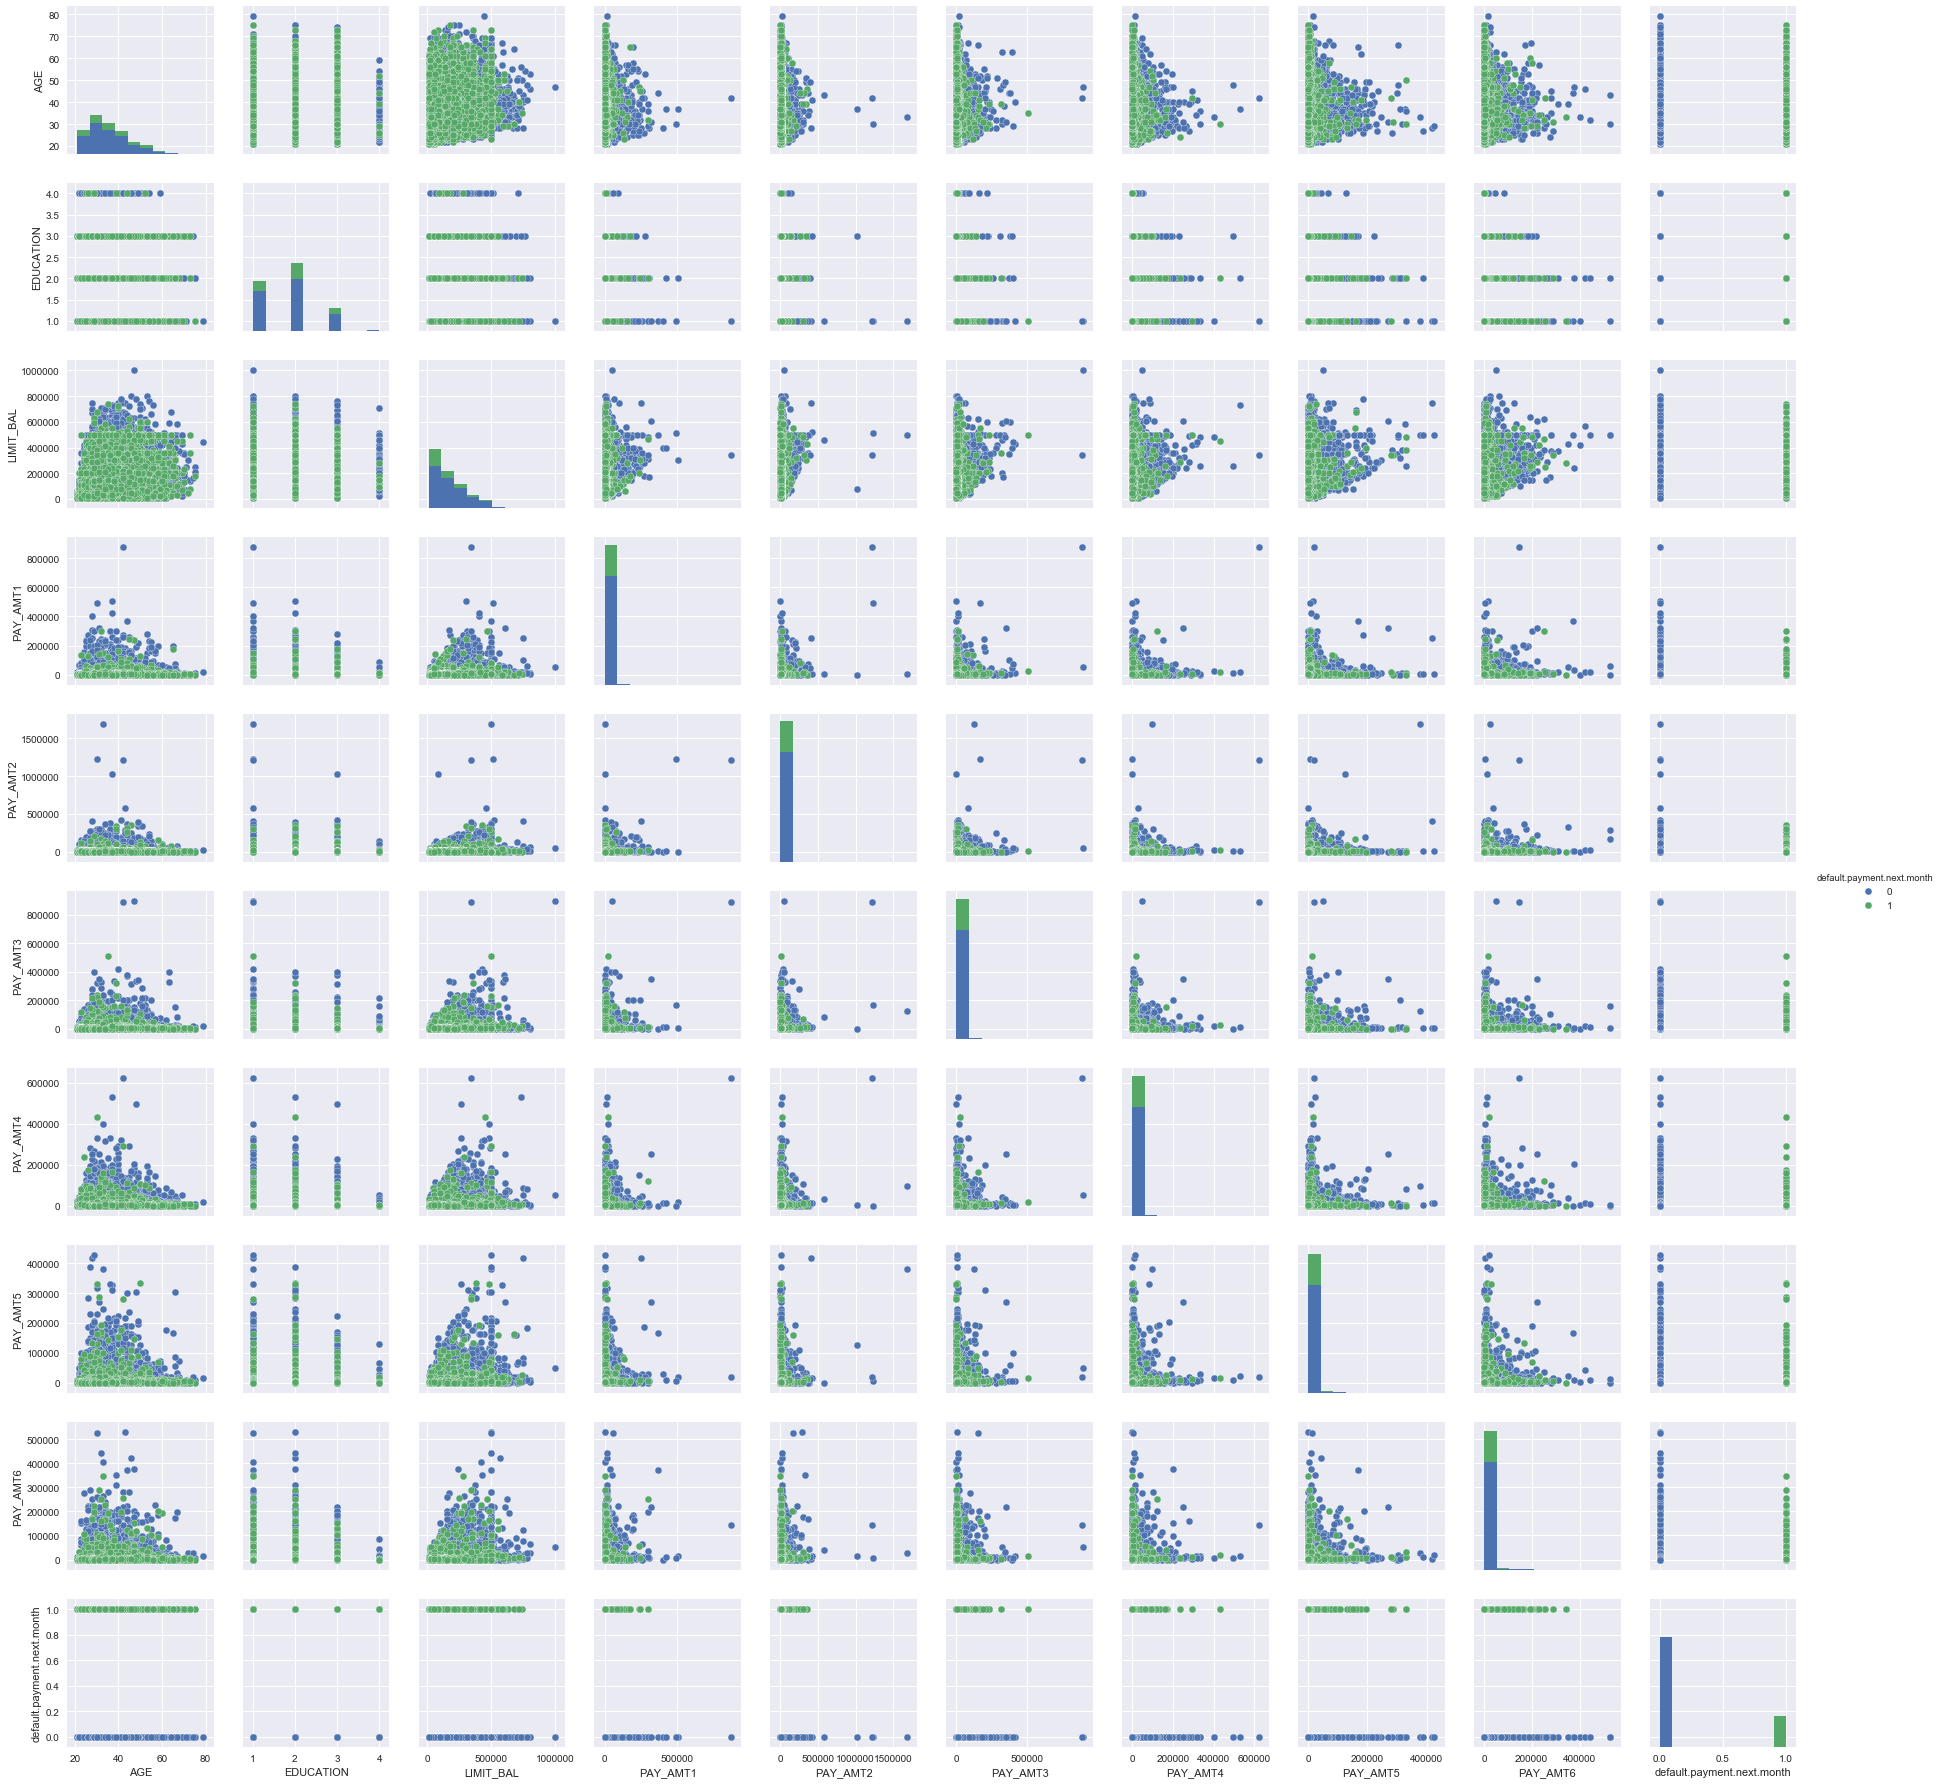

In [28]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
bill_box = sns.pairplot(data=uci_dataset[['AGE', 'EDUCATION', 'LIMIT_BAL', 'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'default.payment.next.month']],
                        hue='default.payment.next.month')

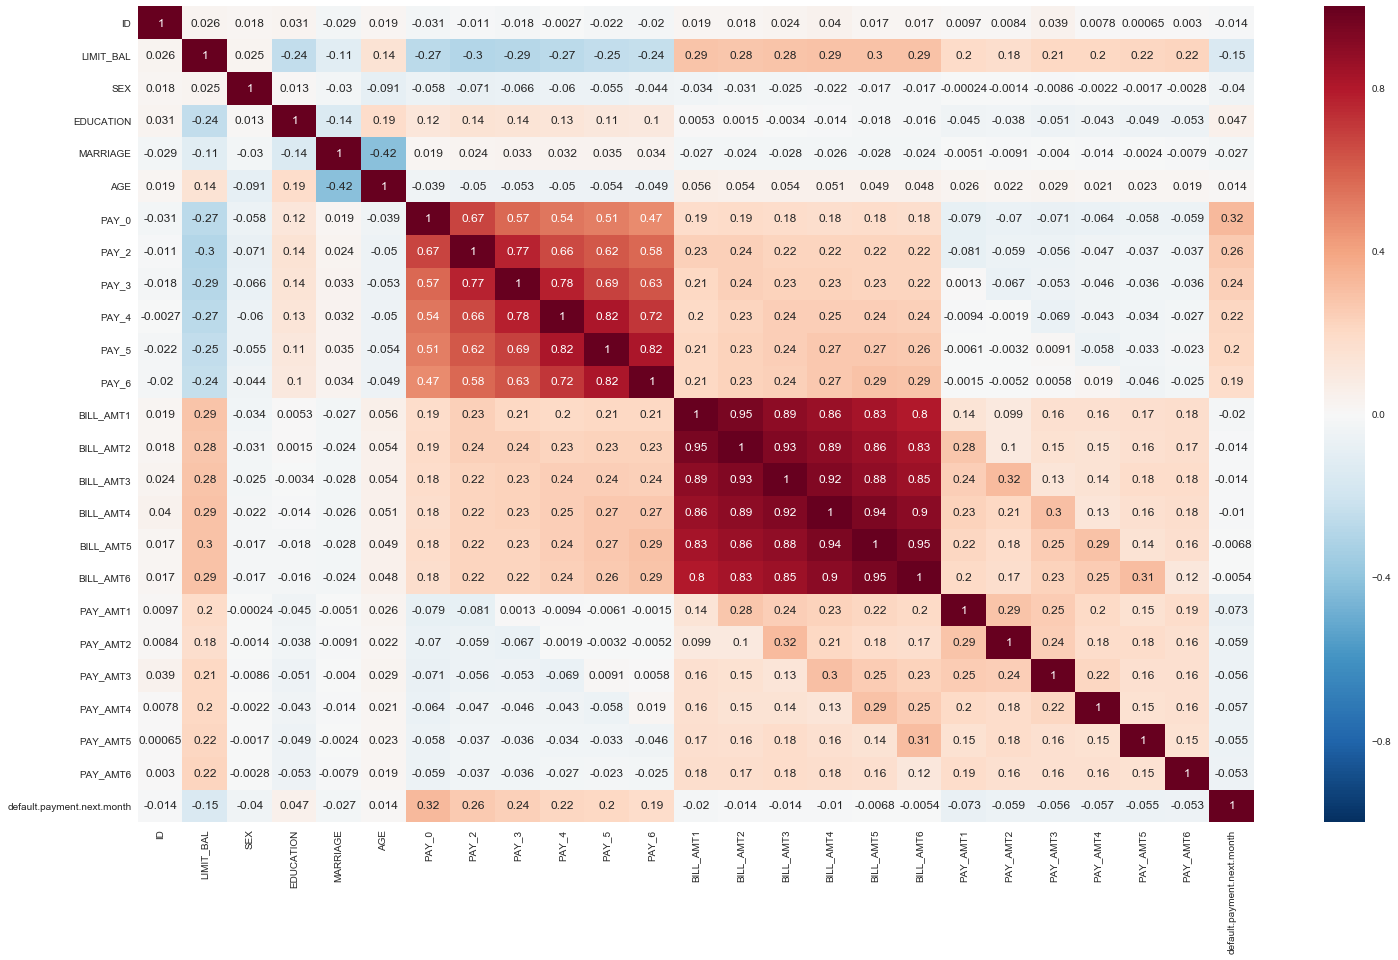

In [29]:
plt.figure(figsize=(25,15))
corr_mat= uci_dataset.corr()
sns.heatmap(corr_mat, annot=True)

Younger individuals in the data set from ages 21-29 have, in general, lower limit balances for their respective accounts. As educational levels increase, there is an increase in limit balances. Married individuals tend to have higher median limit balances in comparison to their single counterparts. Additionally, females exhibit slightly higher limit balances.

Since defaulting depends on an individual's ability to make payments in a 6-month timespan, there is an inference that features relating to an individual's financial capabilities (PAY AMOUNT, PAY STATUS, LIMIT BALANCE, AND BILL AMOUNT) may have a larger role as predictors for credit default.

<h1>Baseline Modeling</h1>
This section explores the models used in predicting credit card default. Models used include: Random Forest, Support Vector Machines, Neural Nets, Naive Bayes, kNN, XGBoost, and an ensemble method approach. These models are cross-validated amongst 10 folds utilizing a scaled variation of the data set.

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, neural_network, naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

seed=42

# Create train-test split
t_train, t_test = train_test_split(uci_dataset, train_size=0.8, test_size=0.2, random_state=seed)

# Create X and Y for fitting
Y = t_train['default.payment.next.month']
X = t_train.drop(['default.payment.next.month'],axis=1)
X = X.drop(['ID'],axis=1)


test_Y = t_test['default.payment.next.month']
t_test = t_test.drop(['ID','default.payment.next.month'], axis=1)
scaled_test = StandardScaler().fit_transform(t_test)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

folds=10

clf_rf = RandomForestClassifier(random_state=seed)
scaled_x = StandardScaler().fit_transform(X)
clf_svm = svm.SVC(random_state=seed, probability=True)
clf_nn = neural_network.MLPClassifier(random_state=seed)
clf_nb = naive_bayes.GaussianNB()
clf_log = LogisticRegression(random_state=seed)
clf_xgb = xgb.XGBClassifier(seed=seed)
clf_knn = KNeighborsClassifier()


models = {
           'Random Forest': clf_rf, 
           'SVM': clf_svm, 
           'NeuralNet': clf_nn, 
           'NaiveBayes': clf_nb,
           'Logistic Regression': clf_log, 
           'XGBoost': clf_xgb,
           'KNN': clf_knn 
         }

In [32]:
for modelname, model in models.items():
   score = cross_val_score(model, scaled_x, Y, cv=folds)
   print(modelname + ' cv_score: ' + str(score.mean()))

Random Forest cv_score: 0.805875083695
SVM cv_score: 0.819749495052
NeuralNet cv_score: 0.818125328154
NaiveBayes cv_score: 0.705589777019
Logistic Regression cv_score: 0.809874980194
XGBoost cv_score: 0.82104109252
KNN cv_score: 0.791582339294


In [33]:
model_results = pd.DataFrame()

for modelname, model in models.items():
   model.fit(scaled_x, Y)
   m_pred = model.predict(scaled_test)
   model_results[modelname] = m_pred
   print(modelname + ' test_score:' + str(metrics.accuracy_score(test_Y, m_pred)))

Random Forest test_score:0.801333333333
SVM test_score:0.819166666667
NeuralNet test_score:0.8165
NaiveBayes test_score:0.7135
Logistic Regression test_score:0.809833333333
XGBoost test_score:0.819333333333
KNN test_score:0.796666666667


An additional step to explore from the baseline models is ensembling, in which multiple learners are used together to improve predictive performance. The test ensemble below utilizes hard voting amongst 3 models: k-Nearest Neighbors, Support Vector Machines, and Neural Nets. It is important to utilize models that exhibit lower correlation amongst each other in order to prevent bias towards one particular answer.

In [34]:
model_results.corr()

,Random Forest,SVM,NeuralNet,NaiveBayes,Logistic Regression,XGBoost,KNN
Random Forest,1.000000,0.643700,0.622064,0.415697,0.571635,0.646993,0.524516
SVM,0.643700,1.000000,0.846721,0.465971,0.787840,0.913767,0.636608
NeuralNet,0.622064,0.846721,1.000000,0.476186,0.729101,0.854690,0.623997
NaiveBayes,0.415697,0.465971,0.476186,1.000000,0.395963,0.480735,0.474953
Logistic Regression,0.571635,0.787840,0.729101,0.395963,1.000000,0.778486,0.564276
XGBoost,0.646993,0.913767,0.854690,0.480735,0.778486,1.000000,0.625478
KNN,0.524516,0.636608,0.623997,0.474953,0.564276,0.625478,1.000000


In [35]:
clf_vot = VotingClassifier(estimators=[
                                       ('knn', clf_knn),
                                       ('rf', clf_rf),
                                       ('nn', clf_nn)
                                      ])

clf_vot.fit(scaled_x,Y)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max...       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False))],
         n_jobs=1, voting='hard', weights=None)

In [36]:
pred = clf_vot.predict(scaled_test)
print('Ensemble score:', metrics.accuracy_score(test_Y, pred))

Ensemble score: 0.816166666667


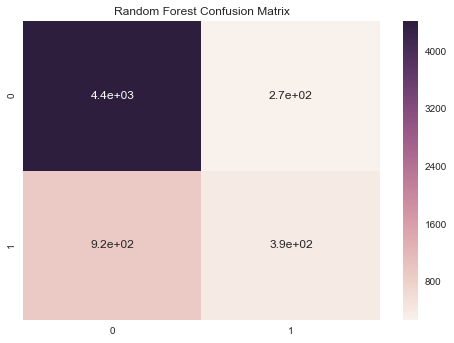

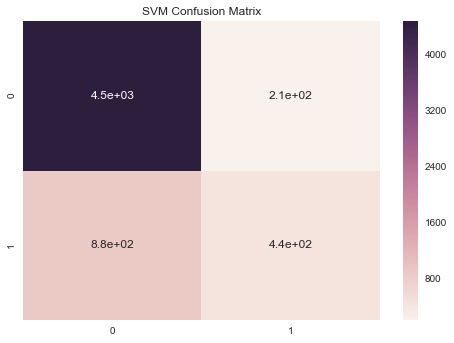

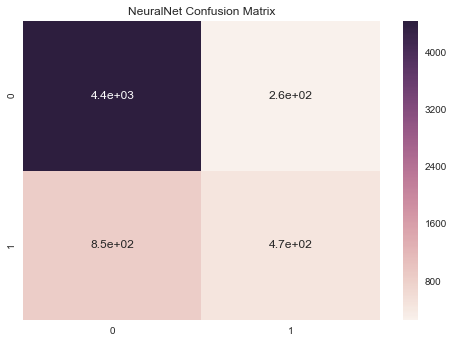

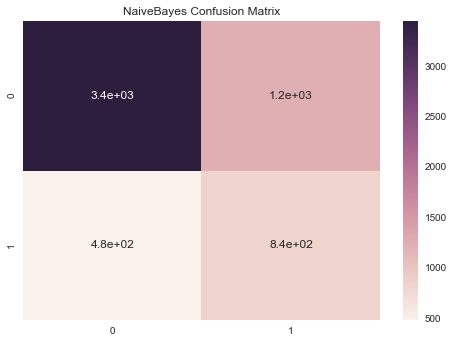

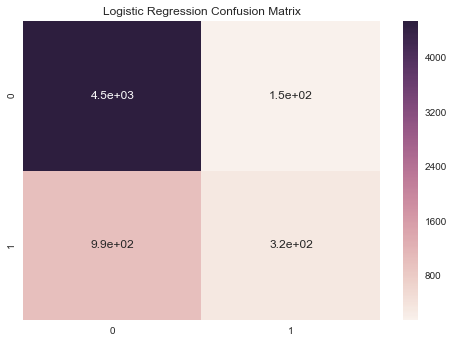

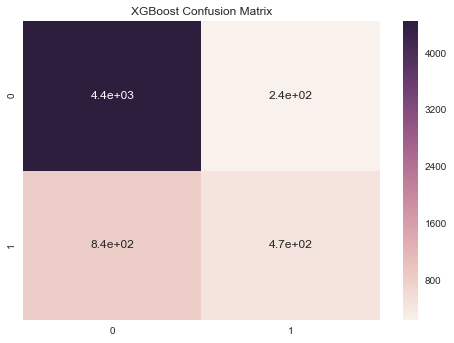

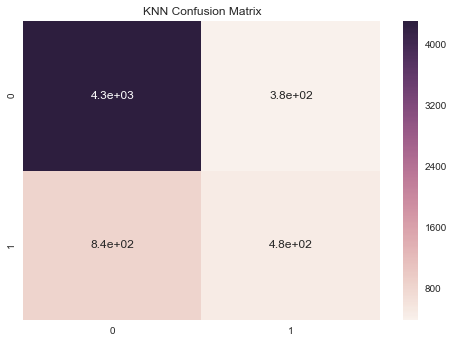

In [65]:
for modelname, _ in models.items():
    plt.figure()
    plt.title(modelname + ' Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(test_Y, model_results[modelname]), annot=True)

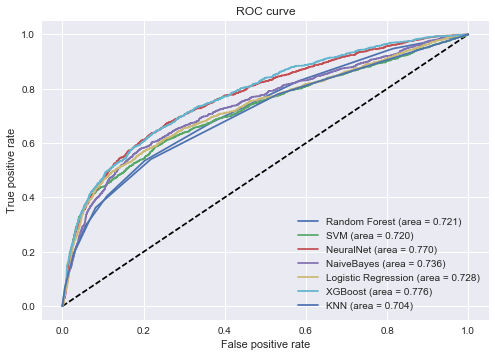

In [32]:
from sklearn.metrics import roc_curve

model_proba = pd.DataFrame()

for modelname, model in models.items():
    model_proba[modelname] = model.predict_proba(scaled_test)[:,1]

fpr = {}
tpr = {}
thresh = {}
for modelname, _ in models.items():
    fpr[modelname], tpr[modelname], thresh[modelname], = roc_curve(test_Y,model_proba[modelname])

    
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
for modelname, _ in models.items():
    modelauc = metrics.auc(fpr[modelname], tpr[modelname])
    plt.plot(fpr[modelname], tpr[modelname], label=modelname + ' (area = %0.3f)' % modelauc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [40]:
from sklearn.model_selection import learning_curve

def plot_learning_curves(title, train_sizes, train_scores, valid_scores, ylim=None):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, np.mean(valid_scores, axis=1), 'o-', color="g", label="Cross-Valid Score")
    plt.legend(loc="best")
    plt.show()

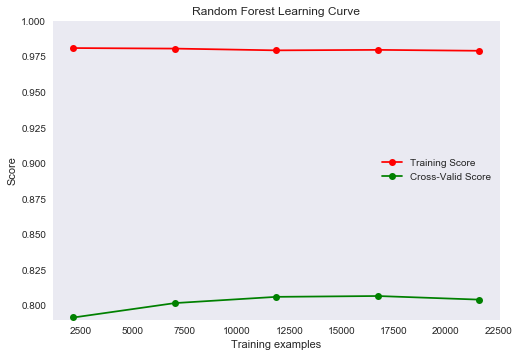

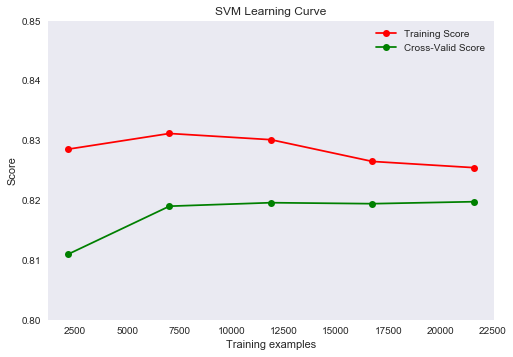

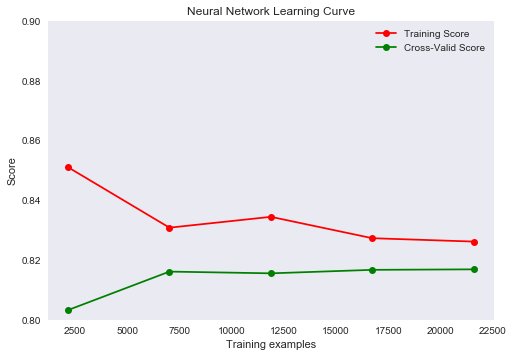

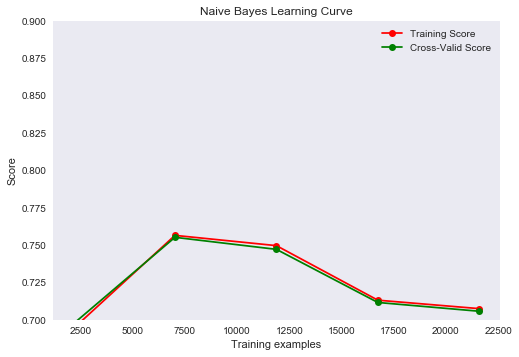

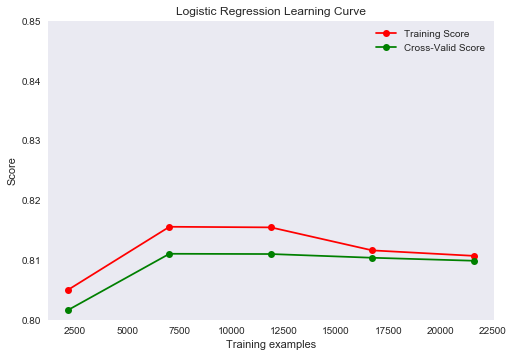

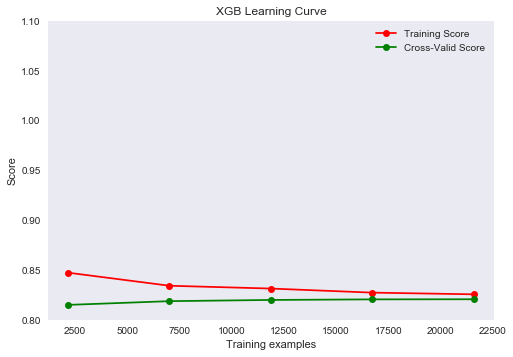

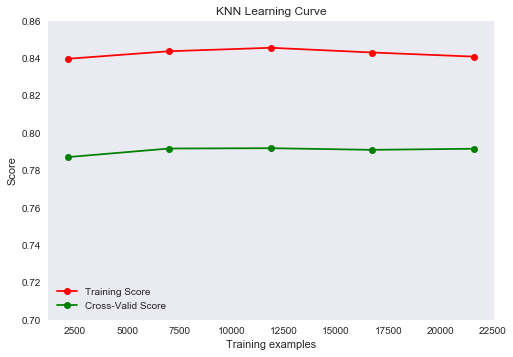

In [53]:
rf_sizes, rf_train_scores, rf_valid_scores = learning_curve(clf_rf, scaled_x, Y, train_sizes=np.linspace(0.1, 1.0, 5.0, 10.0), cv=folds)
plot_learning_curves('Random Forest Learning Curve', rf_sizes, rf_train_scores, rf_valid_scores, (.79, 1.0))

svm_sizes, svm_train_scores, svm_valid_scores = learning_curve(clf_svm, scaled_x, Y, train_sizes=np.linspace(0.1, 1.0, 5.0, 10.0), cv=folds)
plot_learning_curves('SVM Learning Curve', svm_sizes, svm_train_scores, svm_valid_scores, (.8, .85))

nn_sizes, nn_train_scores, nn_valid_scores = learning_curve(clf_nn, scaled_x, Y, train_sizes=np.linspace(0.1,1.0,5.0,10.0), cv=folds)
plot_learning_curves('Neural Network Learning Curve', nn_sizes, nn_train_scores, nn_valid_scores, (.8, .9))

nb_sizes, nb_train_scores, nb_valid_scores = learning_curve(clf_nb, scaled_x, Y, train_sizes=np.linspace(0.1,1.0,5.0,10.0), cv=folds)
plot_learning_curves('Naive Bayes Learning Curve', nb_sizes, nb_train_scores, nb_valid_scores, (.7, .9))

log_sizes, log_train_scores, log_valid_scores = learning_curve(clf_log, scaled_x, Y, train_sizes=np.linspace(0.1,1.0,5.0,10.0), cv=folds)
plot_learning_curves('Logistic Regression Learning Curve', log_sizes, log_train_scores, log_valid_scores, (.8, .85))

xgb_sizes, xgb_train_scores, xgb_valid_scores = learning_curve(clf_xgb, scaled_x, Y, train_sizes=np.linspace(0.1,1.0,5.0,10.0), cv=folds)
plot_learning_curves('XGB Learning Curve', xgb_sizes, xgb_train_scores, xgb_valid_scores, (.8, 1.1))

knn_sizes, knn_train_scores, knn_valid_scores = learning_curve(clf_knn, scaled_x, Y, train_sizes=np.linspace(0.1,1.0,5.0,10.0), cv=folds)
plot_learning_curves('KNN Learning Curve', knn_sizes, knn_train_scores, knn_valid_scores, (.70, .86))


### Preliminary Learning Curve Evaluation
Random forest exhibits extremely high variance which could be resolved by techniques such as reducing model complexity and training on more data.  Albeit to a lesser degree, the SVM and neural network models exhibit a lesser amount of variance, indicated by the slightly larger gap between the two curves, which is to be examined later during performance tweaking.

Naive bayes, on the other hand, suffers from high bias.  It is underperforming and a potential remedy, which may also increase the performance in other models, as well--is feature engineering. 

Regardless of the learning curves, parameter tuning will occur for all models excluding Gaussian Naive Bayes to examine the effects of parameter tuning on model performance.

In [ ]:
param_grid_rf = {
    'n_estimators': [600, 650, 700, 750, 800],
    'max_depth': [7, 9, 11],
    'random_state': [seed]
}
param_grid_knn = {
    'n_neighbors': [14, 16, 18, 20, 22, 24, 26],
    'weights': ['uniform', 'distance'],
    'leaf_size': [20, 30, 40],
    'n_jobs': [-1],
}

In [ ]:
grid_rf = GridSearchCV(clf_rf, param_grid=param_grid_rf, cv=10)

In [ ]:
grid_rf.fit(scaled_x,Y)
# GridSearchCV(cv=10, error_score='raise',
#        estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=None, max_features='auto', max_leaf_nodes=None,
#             min_impurity_split=1e-07, min_samples_leaf=1,
#             min_samples_split=2, min_weight_fraction_leaf=0.0,
#             n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
#             verbose=0, warm_start=False),
#        fit_params={}, iid=True, n_jobs=1,
#        param_grid={'n_estimators': [200, 500, 700, 1000, 1500], 'max_depth': [None, 3, 9, 16, 27, 36, 100]},
#        pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
#        scoring=None, verbose=0)

In [ ]:
print(grid_rf.best_estimator_)
# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=9, max_features='auto', max_leaf_nodes=None,
#             min_impurity_split=1e-07, min_samples_leaf=1,
#             min_samples_split=2, min_weight_fraction_leaf=0.0,
#             n_estimators=700, n_jobs=1, oob_score=False, random_state=42,
#             verbose=0, warm_start=False)

In [ ]:
# print(grid_rf.best_score_)
# 0.819791666667
# max_depth=9
# n_estimators=700

In [ ]:
grid_knn = GridSearchCV(clf_knn, param_grid=param_grid_knn, cv=folds)
grid_knn.fit(scaled_x,Y)

In [ ]:
print(grid_knn.best_estimator_)

In [ ]:
print(grid_knn.best_score_)

### Tuned Model Evaluation
Through extensive grid searching, choices for model hyperparameters are narrowed down. In this section, we evaluate the accuracy metric of the tuned set of models and examine the ROC and learning curves for each.

In [34]:
t_clf_rf = RandomForestClassifier(max_depth=7, n_estimators=700, random_state=seed)
t_clf_svm = svm.SVC(C=30, gamma=0.003, kernel='rbf',random_state=seed, probability=True)
t_clf_nn = neural_network.MLPClassifier(hidden_layer_sizes=5, alpha=0.001, learning_rate_init=0.003,
                                       beta_1=0.01, beta_2=0.3, random_state=seed)
t_clf_nb = naive_bayes.GaussianNB()
t_clf_log = LogisticRegression(C=0.1, random_state=seed)
t_clf_xgb = xgb.XGBClassifier(objective='binary:logistic', learning_rate='0.003',
                             n_estimators=1900, max_depth=3, seed=seed)
t_clf_knn = KNeighborsClassifier(leaf_size=20, n_jobs=-1, n_neighbors=22, weights='distance')

t_models = {
    'Random Forest': t_clf_rf,
    'SVM': t_clf_svm,
    'Neural Net': t_clf_nn,
    'Naive Bayes': t_clf_nb,
    'Logistic Regression': t_clf_log,
    'XGBoost': t_clf_xgb,
    'KNN': t_clf_knn
}

In [35]:
for modelname, model in t_models.items():
   score = cross_val_score(model, scaled_x, Y, cv=folds)
   print(modelname + ' cv_score: ' + str(score.mean()))

Random Forest cv_score: 0.820249286762
SVM cv_score: 0.819957776338
Neural Net cv_score: 0.818791456764
Naive Bayes cv_score: 0.705589777019
Logistic Regression cv_score: 0.809958330896
XGBoost cv_score: 0.821582550868
KNN cv_score: 0.812333817151


In [36]:
tmodel_results = pd.DataFrame()

for modelname, model in t_models.items():
   model.fit(scaled_x, Y)
   m_pred = model.predict(scaled_test)
   tmodel_results[modelname] = m_pred
   print(modelname + ' test_score:' + str(metrics.accuracy_score(test_Y, m_pred)))

Random Forest test_score:0.818666666667
SVM test_score:0.819666666667
Neural Net test_score:0.821666666667
Naive Bayes test_score:0.7135
Logistic Regression test_score:0.81
XGBoost test_score:0.82
KNN test_score:0.811


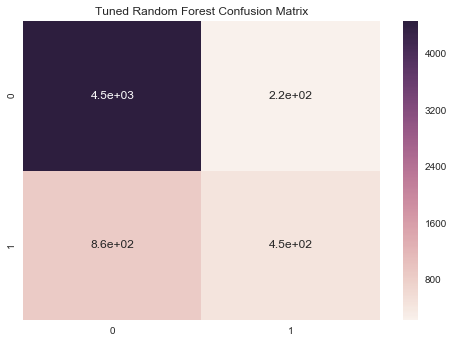

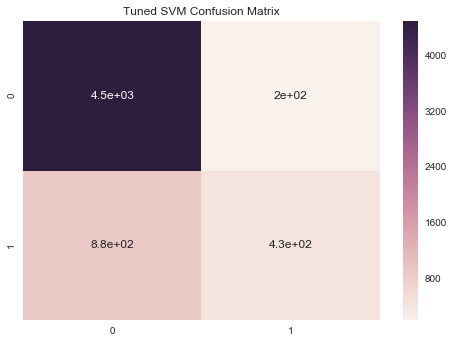

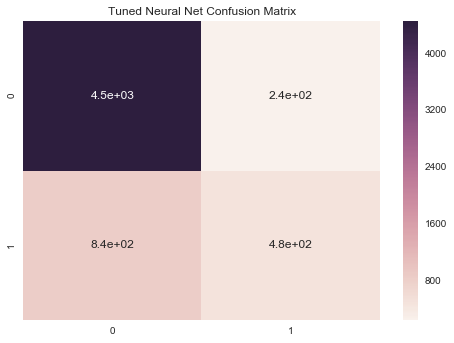

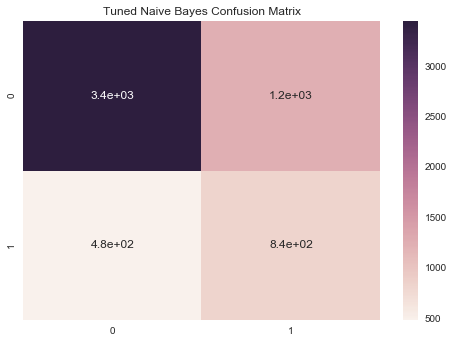

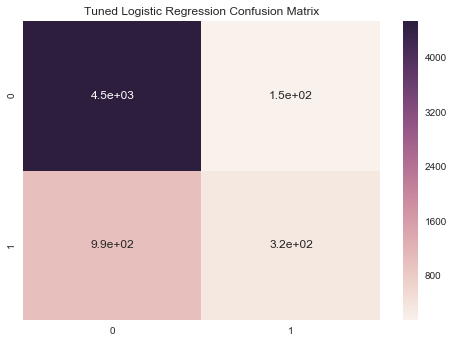

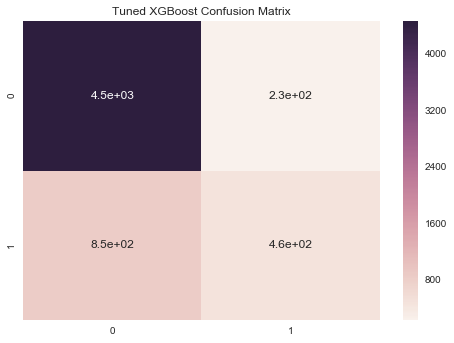

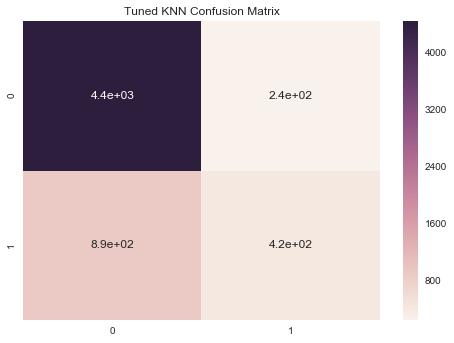

In [68]:
for modelname, _ in t_models.items():
    plt.figure()
    plt.title('Tuned ' + modelname + ' Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(test_Y, tmodel_results[modelname]), annot=True)

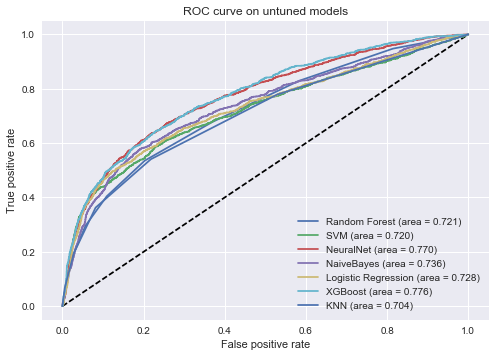

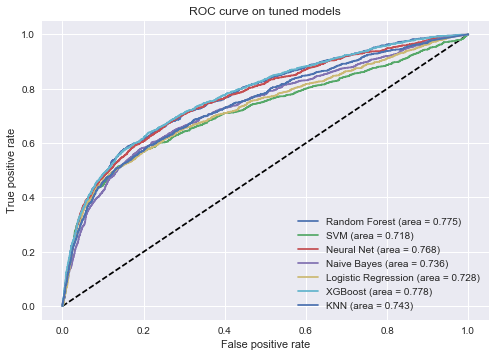

In [79]:
tmodel_proba = {}

for modelname, model in t_models.items():
    tmodel_proba[modelname] = model.predict_proba(scaled_test)[:,1]

t_fpr = {}
t_tpr = {}
t_thresh = {}

for modelname, _ in t_models.items():
    t_fpr[modelname], t_tpr[modelname], t_thresh[modelname], = roc_curve(test_Y,tmodel_proba[modelname])

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
for modelname, _ in models.items():
    modelauc = metrics.auc(fpr[modelname], tpr[modelname])
    plt.plot(fpr[modelname], tpr[modelname], label=modelname + ' (area = %0.3f)' % modelauc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve on untuned models')
plt.legend(loc='best')
    
plt.figure(2)
plt.plot([0, 1], [0, 1], 'k--')
for modelname, _ in t_models.items():
    modelauc = metrics.auc(t_fpr[modelname], t_tpr[modelname])
    plt.plot(t_fpr[modelname], t_tpr[modelname], label=modelname + ' (area = %0.3f)' % modelauc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve on tuned models')
plt.legend(loc='best')
plt.show()

Model tuning results in an improvement of ROC curves and their respective AUC for each model excluding Naive Bayes and Logistic Regression. The most notable improvements are with random forests and k-Nearest Neighbors, resulting in a heightened shift towards the upper left of the chart for each respective ROC curve. SVM and Neural Networks bear a smaller area under curve after tuning, indicating that the grid search has yet to find optimal hyperparameters.

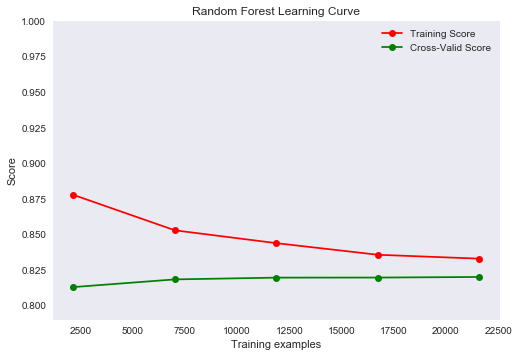

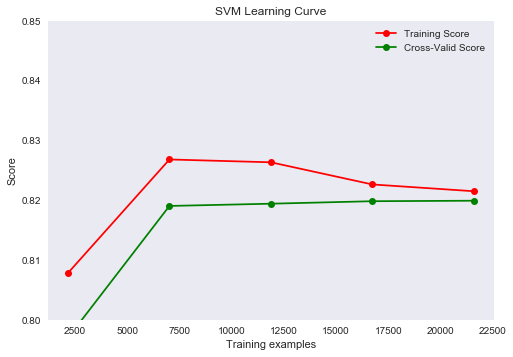

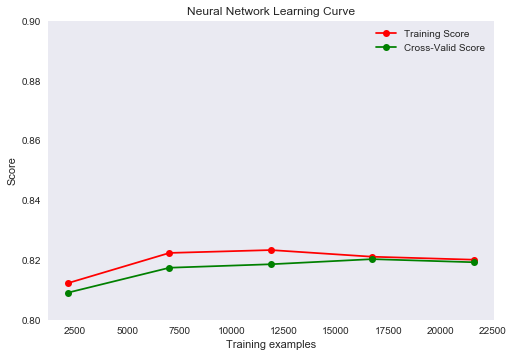

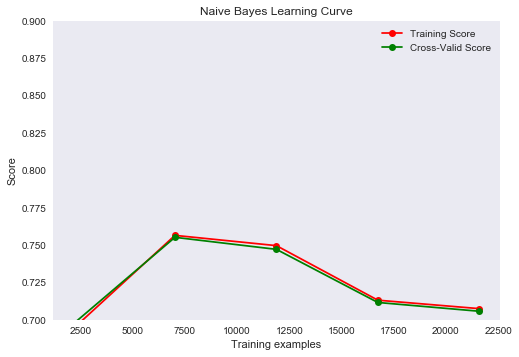

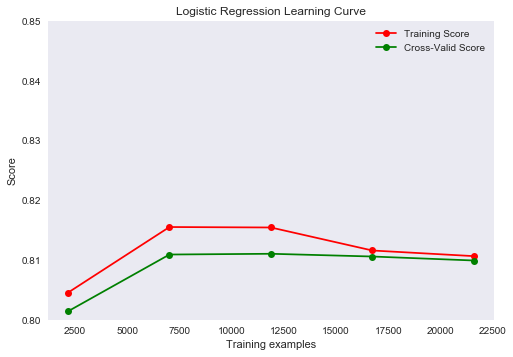

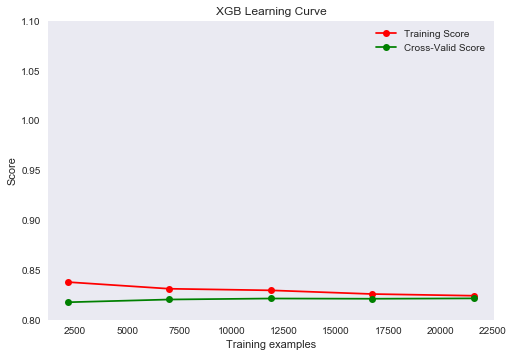

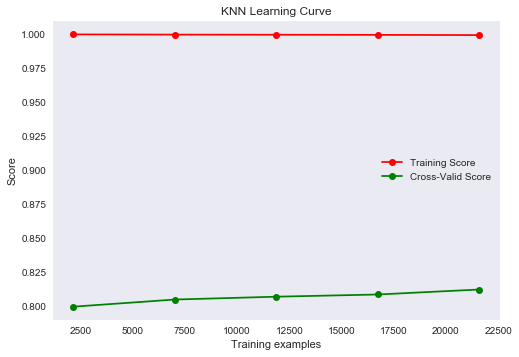

In [74]:
rf_sizes, rf_train_scores, rf_valid_scores = learning_curve(t_clf_rf, scaled_x, Y, train_sizes=np.linspace(0.1, 1.0, 5.0, 10.0), cv=folds)
plot_learning_curves('Random Forest Learning Curve', rf_sizes, rf_train_scores, rf_valid_scores, (.79, 1.0))
svm_sizes, svm_train_scores, svm_valid_scores = learning_curve(t_clf_svm, scaled_x, Y, train_sizes=np.linspace(0.1, 1.0, 5.0, 10.0), cv=folds)
plot_learning_curves('SVM Learning Curve', svm_sizes, svm_train_scores, svm_valid_scores, (.8, .85))
nn_sizes, nn_train_scores, nn_valid_scores = learning_curve(t_clf_nn, scaled_x, Y, train_sizes=np.linspace(0.1,1.0,5.0,10.0), cv=folds)
plot_learning_curves('Neural Network Learning Curve', nn_sizes, nn_train_scores, nn_valid_scores, (.8, .9))
nb_sizes, nb_train_scores, nb_valid_scores = learning_curve(t_clf_nb, scaled_x, Y, train_sizes=np.linspace(0.1,1.0,5.0,10.0), cv=folds)
plot_learning_curves('Naive Bayes Learning Curve', nb_sizes, nb_train_scores, nb_valid_scores, (.7, .9))
log_sizes, log_train_scores, log_valid_scores = learning_curve(t_clf_log, scaled_x, Y, train_sizes=np.linspace(0.1,1.0,5.0,10.0), cv=folds)
plot_learning_curves('Logistic Regression Learning Curve', log_sizes, log_train_scores, log_valid_scores, (.8, .85))
xgb_sizes, xgb_train_scores, xgb_valid_scores = learning_curve(t_clf_xgb, scaled_x, Y, train_sizes=np.linspace(0.1,1.0,5.0,10.0), cv=folds)
plot_learning_curves('XGB Learning Curve', xgb_sizes, xgb_train_scores, xgb_valid_scores, (.8, 1.1))
knn_sizes, knn_train_scores, knn_valid_scores = learning_curve(t_clf_knn, scaled_x, Y, train_sizes=np.linspace(0.1,1.0,5.0,10.0), cv=folds)
plot_learning_curves('KNN Learning Curve', knn_sizes, knn_train_scores, knn_valid_scores, (.79, 1.01))


There is a marked improvement of the error curves in each respective tuned model. Each learning curve exhibits a better display of convergence between training error and validation error, indicating a better performance in terms of generalization. Though the model accuracy amongst our best performing model ranges along the 81% and 82% range (the best performing model being a tuned XGBoost), an additional step could be taken to improve the default prediction capabilities of our model is feature engineering. 

<h1>Final Insights</h1>

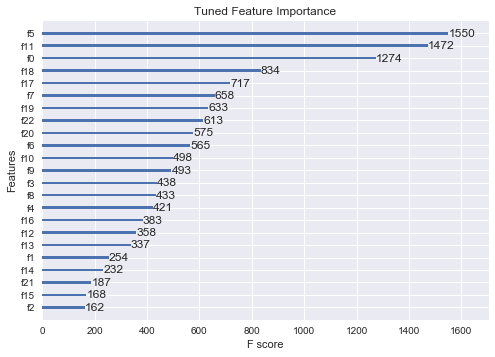

In [72]:
xgb.plot_importance(t_clf_xgb, title='Tuned Feature Importance')

Features f0 (LIMIT_BAL), f11(BILL_AMT1), f5(PAY_0), and to lesser extents, f18(PAY_AMT2) and f17(PAY_AMT1), respectively, are considered the most important features in the model, which supports the hypothesis that risk of defaulting depends on stability. Additionally, socioeconomics such as marriage status, sex, tends to play a lessened role as a predictor for default likelihood.

To revisit this experiment with new data, and additional features in the data gathering process, one could also retrieve locational attributes and extrapolating further features such as cost of living through rent, and other amenities such as food and utilities. Cost of living differs from location, though it would be interesting to examine the problem of credit default in relation to renters, new home owners, and established home owners.
